In [1]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle 

#sklearn
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# spacy
import spacy

from preprocessing_funcs import clean_tweet, get_hashtags, get_emojis

In [2]:
with open('../data_files/processed_tweets.pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.head()

,text,processed
0,#IslamKills Are you trying to say that there w...,islam kill try say terrorist attack europe ref...
1,"Clinton: Trump should’ve apologized more, atta...",clinton trump apologize attack little
2,RT @ltapoll: Who was/is the best president of ...,well president past retweet
3,RT @jww372: I don't have to guess your religio...,guess religion christmas aftermath
4,RT @Shareblue: Pence and his lawyers decided w...,pence lawyer decide official email public can see


In [4]:
tweets = df.processed

In [9]:
vectorizer = CountVectorizer(max_features=70000,
                             token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

doc_word = vectorizer.fit_transform(tweets)

In [10]:
lda_model = LatentDirichletAllocation(n_components=14, random_state=42)

In [11]:
doc_topic = lda_model.fit_transform(doc_word)

In [13]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=7, angle=.99, init='pca')

In [14]:
# 14D --> 2D
tsne_lda = tsne_model.fit_transform(doc_topic) # doc_topic is document-topic matrix from LDA or GuidedLDA

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 203482 samples in 0.450s...
[t-SNE] Computed neighbors for 203482 samples in 353.769s...
[t-SNE] Computed conditional probabilities for sample 1000 / 203482
[t-SNE] Computed conditional probabilities for sample 2000 / 203482
[t-SNE] Computed conditional probabilities for sample 3000 / 203482
[t-SNE] Computed conditional probabilities for sample 4000 / 203482
[t-SNE] Computed conditional probabilities for sample 5000 / 203482
[t-SNE] Computed conditional probabilities for sample 6000 / 203482
[t-SNE] Computed conditional probabilities for sample 7000 / 203482
[t-SNE] Computed conditional probabilities for sample 8000 / 203482
[t-SNE] Computed conditional probabilities for sample 9000 / 203482
[t-SNE] Computed conditional probabilities for sample 10000 / 203482
[t-SNE] Computed conditional probabilities for sample 11000 / 203482
[t-SNE] Computed conditional probabilities for sample 12000 / 203482
[t-SNE] Computed conditional proba

[t-SNE] Computed conditional probabilities for sample 123000 / 203482
[t-SNE] Computed conditional probabilities for sample 124000 / 203482
[t-SNE] Computed conditional probabilities for sample 125000 / 203482
[t-SNE] Computed conditional probabilities for sample 126000 / 203482
[t-SNE] Computed conditional probabilities for sample 127000 / 203482
[t-SNE] Computed conditional probabilities for sample 128000 / 203482
[t-SNE] Computed conditional probabilities for sample 129000 / 203482
[t-SNE] Computed conditional probabilities for sample 130000 / 203482
[t-SNE] Computed conditional probabilities for sample 131000 / 203482
[t-SNE] Computed conditional probabilities for sample 132000 / 203482
[t-SNE] Computed conditional probabilities for sample 133000 / 203482
[t-SNE] Computed conditional probabilities for sample 134000 / 203482
[t-SNE] Computed conditional probabilities for sample 135000 / 203482
[t-SNE] Computed conditional probabilities for sample 136000 / 203482
[t-SNE] Computed con

In [24]:
with open('../data_files/tsne_lda_model.pickle', 'wb') as to_write:
    pickle.dump(tsne_lda, to_write)

In [15]:
df['X_tsne'] = tsne_lda[:,0]
df['Y_tsne'] = tsne_lda[:, 1]

In [16]:
x = df['X_tsne']
y = df['Y_tsne']

/Users/scrapfish/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


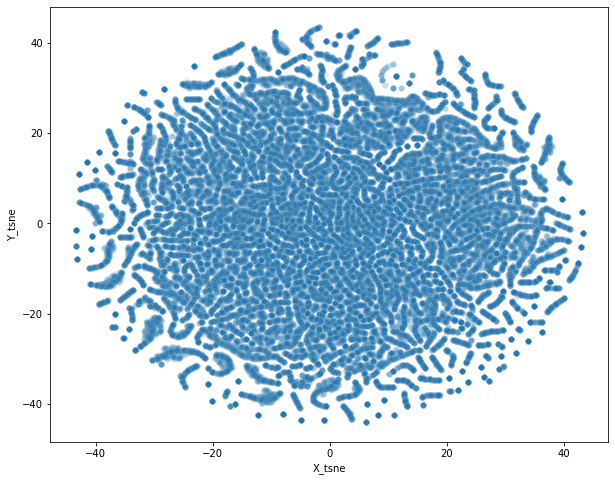

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, alpha=0.05);

In [28]:
target_names = list(range(1,15))

In [29]:
target_names

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

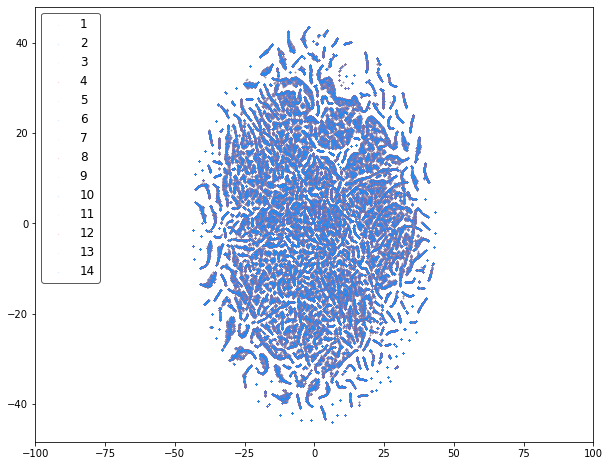

In [40]:
from itertools import cycle 

plt.figure(figsize=(10,8))

colors = cycle(['plum','dodgerblue', 'palegreen','red'])
for c, label in zip(colors, target_names):
    plt.scatter(x, y, c=c, label=label, s=0.25, alpha=0.15)
plt.legend(fontsize=12, loc='upper left', frameon=True, facecolor='#FFFFFF', edgecolor='#333333')
plt.xlim(-100,100);